<a href="https://colab.research.google.com/github/hamza74372/Mall_Customer_Segmentation-Cluster-Analysis-/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)\r\n0001,Male,19,15,39\r\n0002,Male,21,15,81\r\n0003,Female,20,16,6\r\n0004,Female,23,16,77\r\n0005,Female,31,17,40\r\n0006,Female,22,17,76\r\n0007,Female,35,18,6\r\n0008,Female,23,18,94\r\n0009,Male,64,19,3\r\n0010,Female,30,19,72\r\n0011,Male,67,19,14\r\n0012,Female,35,19,99\r\n0013,Female,58,20,15\r\n0014,Female,24,20,77\r\n0015,Male,37,20,13\r\n0016,Male,22,20,79\r\n0017,Female,35,21,35\r\n0018,Male,20,21,66\r\n0019,Male,52,23,29\r\n0020,Female,35,23,98\r\n0021,Male,35,24,35\r\n0022,Male,25,24,73\r\n0023,Female,46,25,5\r\n0024,Male,31,25,73\r\n0025,Female,54,28,14\r\n0026,Male,29,28,82\r\n0027,Female,45,28,32\r\n0028,Male,35,28,61\r\n0029,Female,40,29,31\r\n0030,Female,23,29,87\r\n0031,Male,60,30,4\r\n0032,Female,21,30,73\r\n0033,Male,53,33,4\r\n0034,Male,18,33,92\r\n0035,Female,49,33,14\r\n0036,Female,21,33,81\r\n0037,Female,42,34,17\r\n0038,Female,30,34,73\r\n0039,Female,36,37,26\r\n0040,Female

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


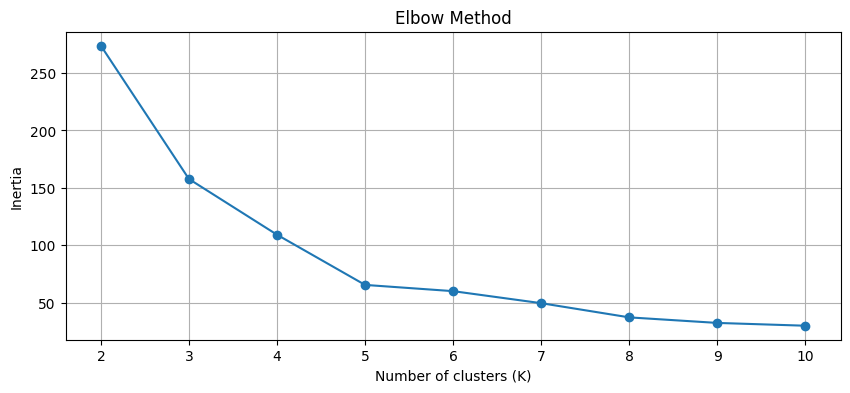

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# 2. Select features for clustering (Income & Spending)
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Find optimal K using Elbow method
inertia = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(10, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


Selected K: 3


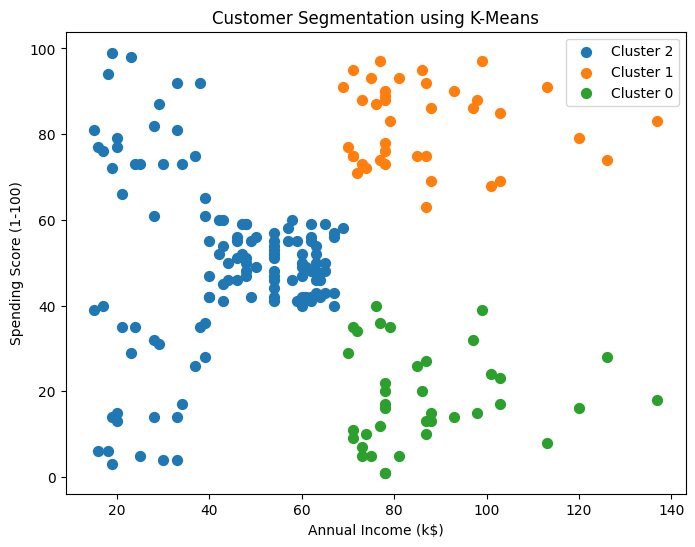


Cluster Profiles:
           Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                          
0        40.39               87.00                   18.63     38
1        32.69               86.54                   82.13     39
2        40.33               44.15                   49.83    123


In [10]:
#Test different number of k (k=3)
best_k = 3  # you can set based on elbow observation
print(f"Selected K: {best_k}")

# 6. Apply KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()

# 8. Analyze cluster profiles
cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profile['Count'] = df.groupby('Cluster').size()
print("\nCluster Profiles:")
print(cluster_profile)


K = 3

Cluster 0: High income, low spending

Cluster 1: High income, high spending (valuable customers)

Cluster 2: Average income & spending (majority of customers)

→ Gives a broad segmentation: Low vs High spenders, and a middle group.


Selected K: 4


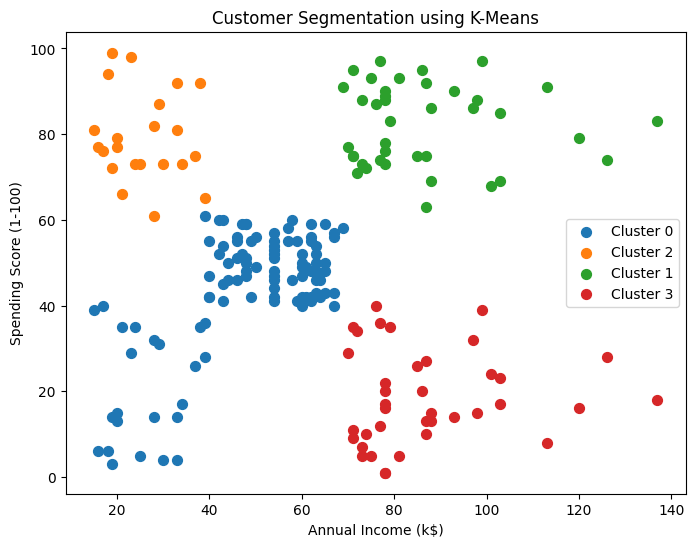


Cluster Profiles:
           Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                          
0        43.60               48.17                   43.40    101
1        32.69               86.54                   82.13     39
2        25.27               25.73                   79.36     22
3        40.39               87.00                   18.63     38


In [11]:
#Test different number of k (k=4)
best_k = 4  # you can set based on elbow observation
print(f"Selected K: {best_k}")

# 6. Apply KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()

# 8. Analyze cluster profiles
cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profile['Count'] = df.groupby('Cluster').size()
print("\nCluster Profiles:")
print(cluster_profile)


K = 4

Cluster 0: Middle income & moderate spending (majority)

Cluster 1: High income, high spending

Cluster 2: Low income, high spending (potentially young shoppers)

Cluster 3: High income, low spending

→ Slightly finer granularity — separates low-income high-spenders.

Selected K: 5


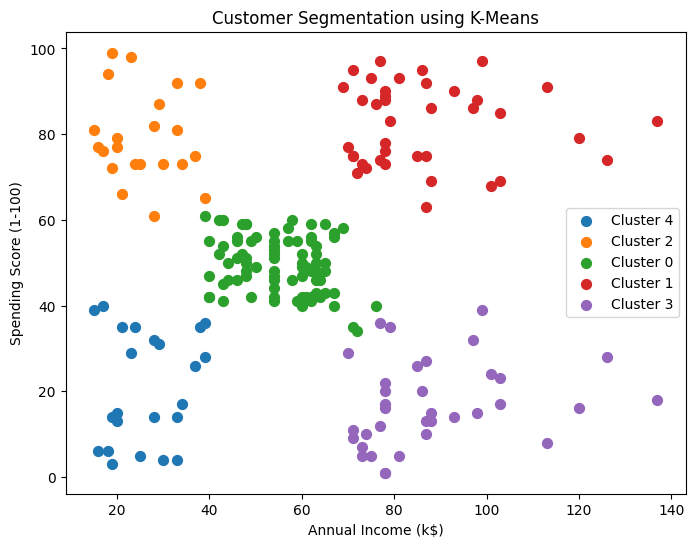


Cluster Profiles:
           Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                          
0        42.72               55.30                   49.52     81
1        32.69               86.54                   82.13     39
2        25.27               25.73                   79.36     22
3        41.11               88.20                   17.11     35
4        45.22               26.30                   20.91     23


In [12]:
#Test different number of k (k=5)
best_k = 5  # you can set based on elbow observation
print(f"Selected K: {best_k}")

# 6. Apply KMeans
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7. Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'],
                cluster_data['Spending Score (1-100)'],
                label=f'Cluster {cluster}', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means')
plt.legend()
plt.show()

# 8. Analyze cluster profiles
cluster_profile = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)
cluster_profile['Count'] = df.groupby('Cluster').size()
print("\nCluster Profiles:")
print(cluster_profile)


K = 5

Cluster 0: Average income & spending

Cluster 1: High income, high spending

Cluster 2: Low income, high spending

Cluster 3: High income, low spending

Cluster 4: Low income, low spending

→ Best for marketing strategies — distinguishes low-income low-spenders from low-income high-spenders.